# SWMAL Exercise

## Intro


We startup by reusing parts of `01_the_machine_learning_landscape.ipynb` from Géron [GITHOML]. So we begin with what Géron says about life satisfactions vs GDP per capita.
 
Halfway down this notebook, a list of questions for SWMAL is presented.

## Chapter 1 – The Machine Learning landscape

_This is the code used to generate some of the figures in chapter 1._

### Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [49]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [50]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [51]:
import os
datapath = os.path.join("datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! dir

print("\nOK")

 Volume in drive C is BOOTCAMP
OK

 Volume Serial Number is 0246-9FF7

 Directory of c:\gitterne\6-Semester\MAL\L01

06-02-2024  10:02    <DIR>          .
06-02-2024  10:02    <DIR>          ..
06-02-2024  10:02    <DIR>          .ipynb_checkpoints
06-02-2024  10:02    <DIR>          datasets
06-02-2024  10:02    <DIR>          extraUtils
06-02-2024  10:02           106.639 intro.ipynb
06-02-2024  10:16           233.298 intro_assignment.ipynb
06-02-2024  10:02    <DIR>          libitmal
06-02-2024  10:02            13.391 modules_and_classes.ipynb
06-02-2024  10:02             5.407 modules_and_classes_assignment.ipynb
               4 File(s)        358.735 bytes
               6 Dir(s)  104.643.649.536 bytes free


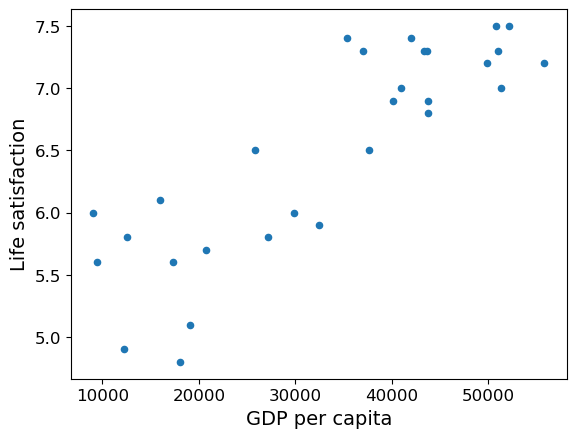

[[5.96242338]]
OK


In [52]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

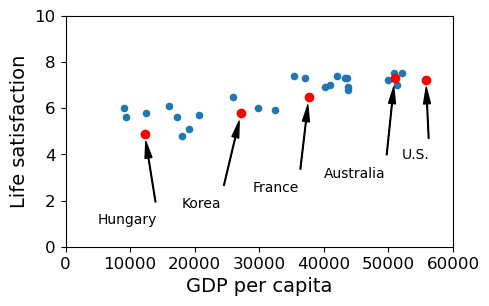

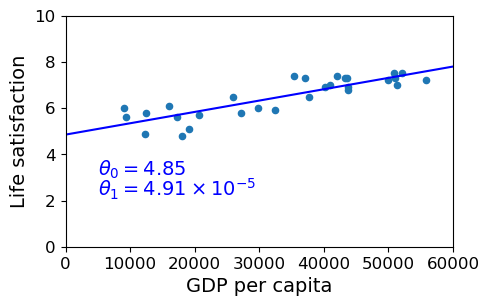

OK


In [53]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

### Qa) The $\theta$ parameters and the $R^2$ Score
 
Extract the score=0.734 for the model using data (X,y) and explain what $R^2$ score measures in broad terms

$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred}~)^2   ~~~&\small \textrm{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true}~)^2 ~~~&\small \textrm{total sum of squares}
\end{array}
$$

**Hvad vi fandt ud af og hvad ska vi skrive på engelsk når vi skal lyde kloge**

 $\theta_0$ = skæring på y-aksen

 $\theta_1$ = hældningskoefficienten

 Score / Forklaringsgraden = Hvor godt lortet passer på. Min 0, maks 1. Kæmpe skidt hvis den er 1, så der noget galt. Så gerne tæt på 1, men ikke helt deroppe, for så passer den perfekt og det gør det fandme aldrig. En fitness/goodness. 

In [54]:
theta_0 = model.intercept_
theta_1 = model.coef_[0]
score = model.score(X, y)

print("Theta_0 (Intercept):", theta_0)
print("Theta_1 (Coefficient):", theta_1)
print("Score:", score)

Theta_0 (Intercept): [4.8530528]
Theta_1 (Coefficient): [4.91154459e-05]
Score: 0.7344414355437031


### Qb) Using k-Nearest Neighbors

Instead of using linear regression, it will now be a k-nearest neighbour algorithm, here with k=3.

In [55]:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [56]:
# Preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


X.shape= (29, 1)
y.shape= (29, 1)


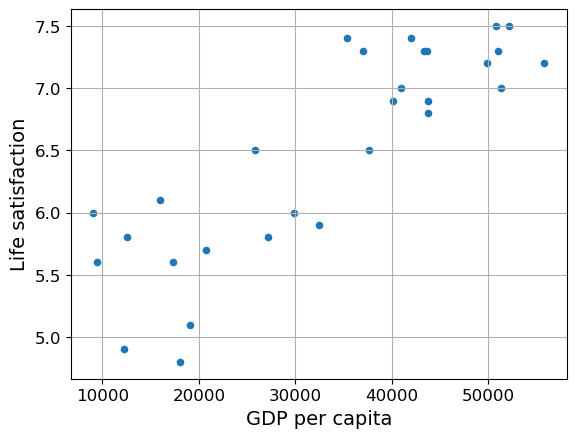

KNN prediction:  [[5.76666667]]
Linear regression prediction:  [[5.96242338]]
KKN score:  0.8525732853499179
Linear score:  0.7344414355437031


In [57]:
from sklearn.neighbors import KNeighborsRegressor

# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.grid(True)
plt.show()

# Select and train a model
knn = KNeighborsRegressor(n_neighbors=3)

# Train the new model
knn.fit(X, y) 


# Predictions for Cyprus 
print("KNN prediction: ", knn.predict(X_new))  
print("Linear regression prediction: ", lin1.predict(X_new))  

# Evaluating the models 
print("KKN score: ", knn.score(X, y))
print("Linear score: ", lin1.score(X, y))





As seen in the calculations above, the KNN prediction for Cyprus is 5.77, which is a bit less than the linear prediction of 5.96. 

KNN uses the score method of the coefficient of determination (R^2), as does the linear regression model. This means they are able to be compared, since they use the same scoring methods. 


The model used here is the "Regression based on k-nearest neighbors" (URL: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)








### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check




But that not the full story. Try plotting the prediction for both models in the same graph and tune the `k_neighbor` parameter of the `KNeighborsRegressor` model.  

Choosing `k_neighbor=1` produces a nice `score=1`, that seems optimal...but is it really so good?
- NEJ

Plotting the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) (the `M` matrix below) and then predict the corresponding y value will sheed some light to this. 

Now reusing the plots stubs below, try to explain why the k-nearest neighbour with `k_neighbor=1` has such a good score.
- Når der kun er en nabo, så vil den altid ramme stop on på hver eneste datapoint. Kontra billedet der har tre neighbors, forsøger den så vidt muligt at ramme alle punkter, men det kan den jo ikke. Det kan den godt, hvis den kun skal gå 1 frem og tilbage.

Does a score=1 with `k_neighbor=1`also mean that this would be the prefered estimator for the job?
- NO

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

1.0


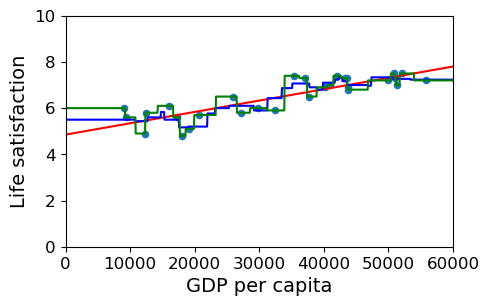

In [58]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = lin1.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
 
# Select and train a model with neighbor 1
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X, y) 
y_pred_knn1 = knn1.predict(M)    
plt.plot(m, y_pred_knn1, "g")
print(knn1.score(X, y))
 

### Qd) Trying out a Neural Network

Let us then try a Neural Network on the data, using the fit-predict interface allows us to replug a new model into our existing code.

There are a number of different NN's available, let's just hook into Scikit-learns Multi-Layer Perceptron for regression, that is an 'MLPRegressor'. 

Now, the data-set for training the MLP is really not well scaled, so we need to tweak a lot of parameters in the MLP just to get it to produce some sensible output: with out preprocessing and scaling of the input data, `X`, the MLP is really a bad choice of model for the job since it so easily produces garbage output. 

Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

Iteration 1, loss = 290434295.23044360
Iteration 2, loss = 286926974.91845930
Iteration 3, loss = 283445091.80120468
Iteration 4, loss = 279989007.88284469
Iteration 5, loss = 276559070.05886549
Iteration 6, loss = 273155609.32856679
Iteration 7, loss = 269778940.07033998
Iteration 8, loss = 266429359.38609853
Iteration 9, loss = 263107146.52031821
Iteration 10, loss = 259812562.35816029
Iteration 11, loss = 256545849.00610605
Iteration 12, loss = 253307229.45747611
Iteration 13, loss = 250096907.34413815
Iteration 14, loss = 246915066.77466321
Iteration 15, loss = 243761872.25819016
Iteration 16, loss = 240637468.71230754
Iteration 17, loss = 237541981.55239332
Iteration 18, loss = 234475516.85906243
Iteration 19, loss = 231438161.61967900
Iteration 20, loss = 228429984.03930050
Iteration 21, loss = 225451033.91592681
Iteration 22, loss = 222501343.07455081
Iteration 23, loss = 219580925.85422322
Iteration 24, loss = 216689779.64216983
Iteration 25, loss = 213827885.44891000
Iteration

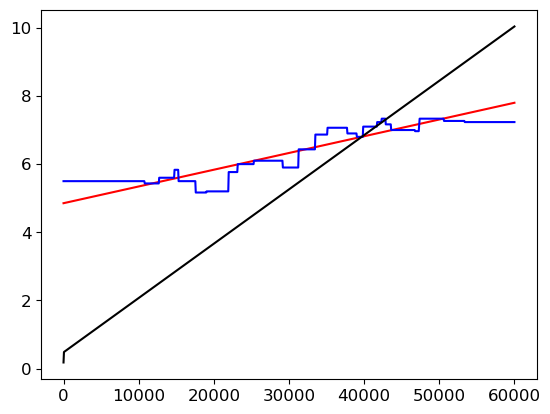

In [59]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

print(mlp.score(X, y))

### Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

We have trained the mlp model, which changes each time the code is run because it's trained by a neural network now.
The neural network stops the training when it doesn't improve more than tol=0.000010 for 10 consecutive epochs.


### Can the `MLPRegressor` score function be compared with the linear and KNN-scores?
They can be compared since the score function is implemented in the same way. The result is way different from the score results of the linear and knn scores, which in this case means that the mlp model is worse at the prediction since the result (R^2) is negative. This means that the predicted values are performing worse than if you where to take the average value of the data as a prediction. (Læs lige op på det her?)


###  [OPTIONAL] Qe) Neural Network with pre-scaling

Now, the neurons in neural networks normally expects input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range the you put of the neuron will saturate to it's min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. To af fix to the problem in Qd) is to preprocess data by scaling it down to something more sensible.

Try to scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

In [60]:
# TODO: add your code here..
assert False, "TODO: try prescale data for the MPL...any better?"

AssertionError: TODO: try prescale data for the MPL...any better?

REVISIONS||
:- | :-
2018-12-18| CEF, initial.                  
2019-01-24| CEF, spell checked and update. 
2019-01-30| CEF, removed reset -f, did not work on all PC's. 
2019-08-20| CEF, E19 ITMAL update. 
2019-08-26| CEF, minor mod to NN exercise.
2019-08-28| CEF, fixed dataset dir issue, datapath"../datasets" changed to "./datasets".
2020-01-25| CEF, F20 ITMAL update.
2020-08-06| CEF, E20 ITMAL update, minor fix of ls to dir and added exception to datasets load, udpated figs paths.
2020-09-24| CEF, updated text to R2, Qa exe.
2020-09-28| CEF, updated R2 and theta extraction, use python attributes, moved revision table. Added comment about MLP.
2021-01-12| CEF, updated Qe.
2021-02-08| CEF, added ls for Mac/Linux to dir command cell. 
2021-08-02| CEF, update to E21 ITMAL.
2021-08-03| CEF, fixed ref to p21 => p.22.
2022-01-25| CEF, update to F22 SWMAL.
2022-08-30| CEF, update to v1 changes.
2023-08-30| CEF, minor table update for.
2023-09-01| CEF, fixed ref to p.22 => p.28, changed LaTeX mbox and newcommand (VSCode error) to textrm/mathrm and renewcommand.
